In [1]:
import torch 

In [27]:
ix = torch.randperm(swarm.walkers.observs.shape[0])
obs = swarm.walkers.observs

In [26]:
rands = torch.rand(swarm.walkers.observs.shape)

In [31]:
torch.where(rands > 0.5, obs, torch.zeros_like(obs))

tensor([[-0.1361,  0.0000, -0.2575, -0.0340,  0.6372,  0.2250,  0.9963,  0.0000,
         -0.1019],
        [ 0.0000,  0.1619,  0.1950,  0.0000,  0.0000,  0.0000, -1.0202,  0.0000,
         -0.3745],
        [ 0.4650,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.6649,
         -0.4278],
        [-0.0216,  0.5845,  0.0000, -0.2343,  0.0000,  0.4583,  0.2654,  0.0000,
          0.0000],
        [ 0.4317,  0.0000,  0.0000,  0.0000,  0.6209,  0.0000,  0.1019,  0.0000,
         -0.1505],
        [ 0.0000,  0.8267,  0.0000,  0.0000,  0.0092,  0.1778,  0.3964,  0.0000,
          0.6135],
        [ 0.0000,  0.0000, -0.3420,  0.2470,  0.0000,  0.0000,  0.0000,  0.0000,
         -0.0607],
        [ 0.0000,  0.0000,  0.0460, -0.5253, -0.4339,  0.0000, -0.7801, -0.0534,
          0.0000],
        [ 0.0000,  0.0000,  0.7826,  1.4145, -1.2600,  1.3463,  0.0000,  1.2341,
         -1.2261],
        [ 0.0000,  0.0000,  0.0000, -1.4356,  0.0000,  0.0000,  0.0000,  0.0000,
          0.8722],


In [34]:
x = torch.rand((2, 3))

In [35]:
torch.clamp(x, torch.ones_like(x) *0.5, torch.ones_like(x))

TypeError: clamp(): argument 'min' (position 2) must be Number, not Tensor

In [33]:
torch.rand((10,10)).shape

torch.Size([10, 10])

In [ ]:
torch.where()

In [1]:
import numpy as np
import pytest
import torch

from fragile.optimize.models import NormalContinuous
from fragile.optimize.mapper import FunctionMapper, LocalMapper
from fragile.optimize.encoder import Vector
from fragile.optimize.benchmarks import EggHolder, StyblinskiTang, LennardJones
from fragile.optimize.models import EncoderSampler, BestDtEncoderSamper, ESSampler, NormalContinuous
same = lambda x: torch.ones(len(x)).reshape(-1,1) * 10 #*  - torch.sum(x ** 2, 1)
%matplotlib inline

In [2]:
from fragile.core.utils import to_numpy, to_tensor
from fragile.optimize.local_optimizer import Minimizer, MinimizerWrapper
   

In [9]:
n_atoms = 38
n_vectors = n_atoms * 3
model = lambda x: ESSampler(recombination=0.5, mutation=0.5, random_step_prob=0.03,
    high=np.array([1.5] * n_vectors), low=np.array([-1.5] * n_vectors),
    # high=np.array([512] * n_vectors), low=np.array([-512] * n_vectors),
    env=x, shape=None,
    loc=0.,
    scale=0.01, 
    mean_dt=1,
    std_dt=0,
    min_dt=1, max_dt=1,
)

In [10]:
lennard = lambda: LennardJones(n_atoms=n_atoms)
minim = lambda:MinimizerWrapper(LennardJones(n_atoms=n_atoms), options=dict(maxiter=10))

In [11]:
reward_scale=2
pest_scale=0.
distance_scale=1

In [14]:

plot_every = 50
swarm = LocalMapper(
        n_vectors=35,
        env = lennard,#StyblinskiTang((n_vectors,)),
        model=model,
        n_walkers=50,
        timeout=50000000,
        timeout_threshold=20000000,
        reward_scale=reward_scale,
        _accumulate_rewards=False,
        plot_steps=True,
        pest_scale=pest_scale,
        distance_scale=distance_scale,
    plot_every=plot_every, 
    use_tree=False,
    #options=dict(maxiter=100),
    )

(114,)


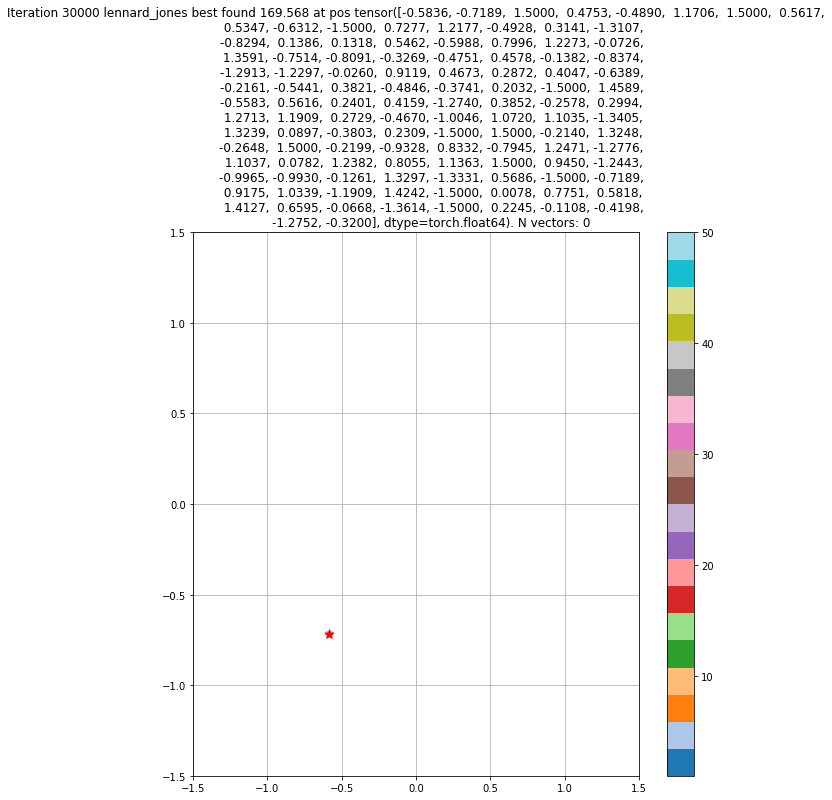

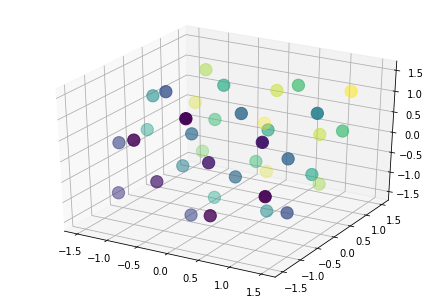

Best reward found: 169.56798 at position: tensor([-0.5836, -0.7189,  1.5000,  0.4753, -0.4890,  1.1706,  1.5000,  0.5617,
         0.5347, -0.6312, -1.5000,  0.7277,  1.2177, -0.4928,  0.3141, -1.3107,
        -0.8294,  0.1386,  0.1318,  0.5462, -0.5988,  0.7996,  1.2273, -0.0726,
         1.3591, -0.7514, -0.8091, -0.3269, -0.4751,  0.4578, -0.1382, -0.8374,
        -1.2913, -1.2297, -0.0260,  0.9119,  0.4673,  0.2872,  0.4047, -0.6389,
        -0.2161, -0.5441,  0.3821, -0.4846, -0.3741,  0.2032, -1.5000,  1.4589,
        -0.5583,  0.5616,  0.2401,  0.4159, -1.2740,  0.3852, -0.2578,  0.2994,
         1.2713,  1.1909,  0.2729, -0.4670, -1.0046,  1.0720,  1.1035, -1.3405,
         1.3239,  0.0897, -0.3803,  0.2309, -1.5000,  1.5000, -0.2140,  1.3248,
        -0.2648,  1.5000, -0.2199, -0.9328,  0.8332, -0.7945,  1.2471, -1.2776,
         1.1037,  0.0782,  1.2382,  0.8055,  1.1363,  1.5000,  0.9450, -1.2443,
        -0.9965, -0.9930, -0.1261,  1.3297, -1.3331,  0.5686, -1.5000, -0.7189

In [15]:
swarm.walkers.reset()
swarm.reset()
swarm.walkers.max_iters = 30000
_ = swarm.run_swarm(print_every=plot_every)

In [25]:
swarm.walkers.actions.view()

TypeError: view() missing 1 required positional arguments: "size"

In [12]:
swarm.walkers.cum_rewards

tensor([[-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664.5461],
        [-664

In [20]:
from scipy.optimize import minimize
def minimize_obs(x, env):
    def _optimize(x):
        x = to_tensor(x).view(1,-1)
        y = env.function(x)
        return -float(y)
    num_x = to_numpy(x)
    return minimize(_optimize, num_x)#, *self.args, **self.kwargs)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
x = swarm.walkers.observs[0].view(-1,3)

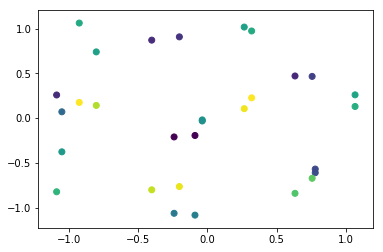

In [19]:
plt.scatter(x[:,0], x[:, 1], c=x[:,2], cmap=plt.cm.viridis)
plt.scatter(x[:,0], x[:, 2], c=x[:,1], cmap=plt.cm.viridis)

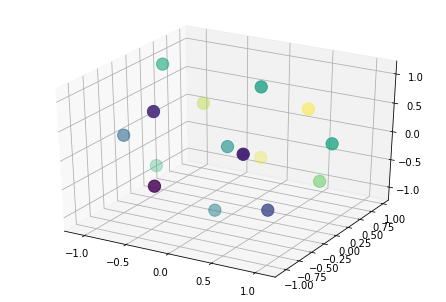

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:, 1], x[:, 2], c=x[:,1], cmap=plt.cm.viridis, s=150, alpha)

(<Figure size 432x288 with 221 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd069d2b898>,
       dtype=object))

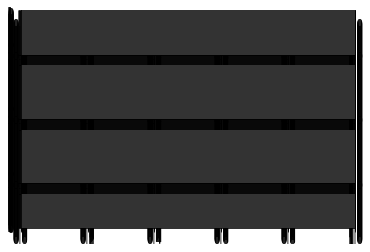

In [32]:
plt.subplots(221)

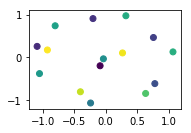

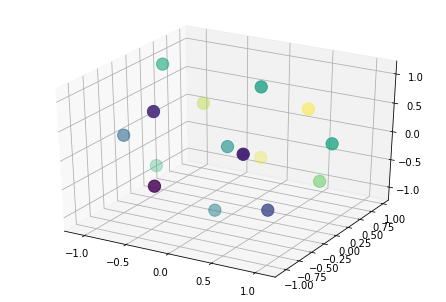

In [36]:


import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)




plt.subplot(221)
plt.scatter(x[:,0], x[:, 1], c=x[:,2], cmap=plt.cm.viridis)

#plt.subplot(222)
#plt.scatter(x[:,0], x[:, 2], c=x[:,1], cmap=plt.cm.viridis)

fig,plt.subplot(222)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:, 1], x[:, 2], c=x[:,1], cmap=plt.cm.viridis, s=150)
plt.show()


In [74]:
minim = Minimizer(swarm.env,options=dict(maxiter=10))

In [75]:
result = minim.minimize(swarm.walkers.best_state)

In [76]:
result["fun"]

-10.646494367434205

In [50]:
result["x"]

array([-0.26531191, -0.19811262, -0.23635508,  0.56249148,  0.41058238,
       -0.03613584, -0.88953125,  0.14552889, -1.14368183, -4.16894757,
        1.72745475,  3.06451008, -1.06549889, -0.82285127,  0.16249431,
        1.96512785, -0.72188981, -2.89489881,  3.01743997,  0.75366651,
       -0.10547482, -1.76157762, -0.77552776, -1.51109843,  0.10191326,
       -1.06185751, -0.82191038, -0.89071894, -0.82455569, -0.90287142])

In [25]:
minimize_obs(swarm.walkers.best_obs.view(1,-1), swarm.env)

      fun: -12.302927529580574
 hess_inv: array([[ 0.17439777, -0.0666562 , -0.0446238 ,  0.07610568, -0.05085274,
        -0.0783406 ,  0.12596378, -0.03279346, -0.08144527,  0.0824    ,
        -0.05282357, -0.06077497,  0.11176226, -0.07520896, -0.02509475,
         0.095323  , -0.05505705, -0.04436392],
       [-0.0666562 ,  0.16966918, -0.02523386, -0.06289417,  0.06153779,
        -0.05774705, -0.0522921 ,  0.10267992, -0.0569948 , -0.03671594,
         0.09103415, -0.07732225, -0.04274373,  0.14518133, -0.07137584,
        -0.06472522,  0.10322623, -0.03771054],
       [-0.0446238 , -0.02523386,  0.14610952, -0.0674129 , -0.07018998,
         0.09336184, -0.04986342, -0.05539804,  0.09976706, -0.05670819,
        -0.06331807,  0.09598143, -0.04970283, -0.04651686,  0.11000928,
        -0.05782576, -0.0655522 ,  0.12855499],
       [ 0.07610568, -0.06289417, -0.0674129 ,  0.17229903, -0.02180408,
        -0.02051745,  0.09800619, -0.05003934, -0.02764335,  0.10592255,
        -0.

In [25]:
bases = swarm.encoder.get_bases()

In [70]:
swarm.walkers.reset()
swarm.reset()

In [71]:
swarm.walkers.reset()

In [8]:
swarm.walkers.observs.shape

torch.Size([250, 9])

In [73]:
from fragile.optimize.benchmarks import styblinski_tang


In [121]:
best = swarm.walkers.observs[swarm.walkers.rewards.argmax()].detach().clone()
optim = torch.optim.LBFGS([swarm.walkers.observs])

In [122]:
best, closure()

tensor(-10.7149)


(tensor([-0.4478,  1.8925,  3.7959]), tensor(-10.7149))

In [123]:
def closure():
  
    loss = (-styblinski_tang(swarm.walkers.observs)).mean()
    print(loss)
    optim.zero_grad()
    #loss.backward()
    return loss

In [125]:
optim.state

defaultdict(dict, {tensor([[ 4.1844e+00,  9.9291e-02,  4.6208e+00],
                     [-1.2689e+00, -4.6875e+00, -4.4542e+00],
                     [ 1.1409e+00, -3.4658e+00, -1.5880e+00],
                     [ 4.0272e+00,  5.4593e-01, -3.4633e-01],
                     [-2.6021e-01, -1.2523e+00, -2.8864e+00],
                     [ 1.6820e+00,  3.1702e-01,  9.8733e-01],
                     [-4.6645e+00,  6.9850e-01, -4.3020e+00],
                     [-4.2056e+00,  3.8060e+00, -3.7335e+00],
                     [ 1.6335e+00,  4.6444e+00,  3.2997e+00],
                     [ 4.6314e+00,  2.2764e+00, -1.5904e+00],
                     [-4.3117e+00, -3.6732e-01, -4.9712e+00],
                     [-1.9627e+00, -3.8214e+00, -2.2769e+00],
                     [ 4.4393e+00, -8.5502e-01,  4.6055e+00],
                     [ 1.9590e-02, -4.1481e+00, -3.9974e+00],
                     [-2.2484e+00,  3.6853e+00,  1.2443e+00],
                     [-3.1173e+00, -3.5954e+00,  2.1969e-01],
  

In [100]:
optim.step()

TypeError: step() missing 1 required positional argument: 'closure'

In [ ]:
bases_noise * bases.mean(0)

In [ ]:
swarm.walkers.raw_pest

In [ ]:
import matplotlib.pyplot as plt
from fragile.core.utils import to_numpy
def vector_to_arrow(v):
    x, y = v.origin[0], v.origin[1]
    dx, dy = v.end[0] - x, v.end[1] - y
    plt.arrow(float(x), float(y), float(dx), float(dy), width=0.02, color="red")

In [ ]:
plt.cm.copper

In [ ]:
x, y, dx, dy = vector_to_arrow(swarm.encoder.vectors[-1])

In [ ]:
x, y

In [ ]:
plt.arrow(x, y, 1, 1, width=3)

In [ ]:
x, y, rewards = swarm.visited_x, swarm.visited_y, swarm.visited_rewards

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=rewards, cmap=plt.cm.viridis, alpha=0.1)
vals = to_numpy(swarm.walkers.observs)
plt.scatter(vals[:, 0], vals[:, 1])
_ = [vector_to_arrow(v) for v in swarm.encoder.vectors]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import clear_output
%matplotlib inline
plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)
    clear_output(True)

plt.show()

In [ ]:
vals = to_numpy(swarm.walkers.observs)
plt.scatter(vals[:, 0], vals[:, 1])

In [ ]:
vecs = torch.stack([torch.cat((v.origin, v.end)) for v in swarm.encoder.vectors])

X0, X1 = vecs[:, 0].numpy().flatten(), vecs[:, 1].numpy().flatten()
Y0, Y1 = vecs[:, 2].numpy().flatten(), vecs[:, 3].numpy().flatten()

U = X1 - X0
V = Y1 - Y0

plt.quiver(X, Y, U, V, color="red")

In [ ]:
plt.quiver(U, V)

In [ ]:
swarm.step_walkers()

In [ ]:
len(swarm.walkers.encoder)

In [ ]:
swarm.walkers.balance()

In [ ]:
np.unique(swarm.walkers.encoder.encode(swarm.walkers.observs).numpy(),axis=0)

In [ ]:
co = Counter([str(np.arange(20)), str(np.arange(20))])

In [ ]:
co

In [ ]:
torch.stack((torch.arange(20), torch.arange(20))).shape

In [ ]:
def diversity_score(x, total=None):
    n_different_rows = np.unique(to_numpy(x), axis=0).shape[0]
    return n_different_rows if total is None else float(n_different_rows / total)

In [ ]:
diversity_score(swarm.walkers.observs)

In [ ]:
miau = str([10])
type(miau.__hash__())

In [ ]:
[hash(v) for v in swarm.walkers.encoder.vectors]

In [ ]:
rewards = self.processed_rewards.float() ** self.reward_scale.float()
dist = self.distances.float() ** self.dist_scale.float()
virtual_reward = rewards * dist

In [ ]:
A = np.array([[1, 1, 1, 0, 1, 1],
              [1, 1, 1, 0, 1, 1],
              [1, 3, 3, 0, 1, 3]])


In [ ]:
np.unique(A, axis=0).shape[0]

In [ ]:
rewards.shape

In [ ]:
swarm.env.are_in_bounds(swarm.walkers.observs)


In [ ]:
swarm.walkers

In [ ]:
super(Swarm, swarm).__repr__()

In [ ]:
from fragile.core.swarm import Swarm

In [6]:
swarm.walkers.raw_pest

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

In [8]:
def lj_func(x):
    x = to_numpy(x)

    def lennard_jones(U):
        U = U.reshape(-1, 3)
        npart = len(U)
        Epot = 0.0
        for i in range(npart):
            for j in range(npart):
                if i > j:
                    r2 = np.linalg.norm(U[j, :] - U[i, :]) ** 2
                    r2i = 1.0 / r2
                    r6i = r2i * r2i * r2i
                    Epot = Epot + r6i * (r6i - 1.0)
        Epot = Epot * 4
        return Epot

    result = np.array([lennard_jones(x[i, :]) for i in range(x.shape[0])]).reshape(x.shape[0], 1)
    return -1.0 * to_tensor(result)

In [13]:
%timeit lj_func(swarm.walkers.observs)

178 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
def lennard_jones(U):
    U = U.reshape(-1, 3)
    npart = len(U)
    Epot = 0.0
    for i in range(npart):
        for j in range(npart):
            if i > j:
                r2 = np.linalg.norm(U[j, :] - U[i, :]) ** 2
                r2i = 1.0 / r2
                r6i = r2i * r2i * r2i
                Epot = Epot + r6i * (r6i - 1.0)
    Epot = Epot * 4
    return Epot

In [18]:
from numba import jit, prange

@jit(nopython=True)
def lennard_fast(U):
    U = U.reshape(-1, 3)
    npart = len(U)
    Epot = 0.0
    for i in range(npart):
        for j in range(npart):
            if i > j:
                r2 = np.sum((U[j, :] - U[i, :]) ** 2)
                r2i = 1.0 / r2
                r6i = r2i * r2i * r2i
                Epot = Epot + r6i * (r6i - 1.0)
    Epot = Epot * 4
    return Epot

@jit(nopython=True, parallel=False)
def numba_lennard(x):
    result = np.zeros((x.shape[0], 1))
    for i in range(x.shape[0]):
        result[i,0] = lennard_fast(x[i])
    return result

def optim_lj(x):
    x = to_numpy(x).astype(np.float64)
    result = numba_lennard(x)
    return to_tensor(x, dtype=torch.float64)

In [25]:
lennard_fast(swarm.walkers.observs[0].numpy()), lennard_jones(swarm.walkers.observs[0].numpy())

(932464.4173913806, 932464.4371204223)

In [20]:
%timeit lennard_jones(swarm.walkers.observs[0].numpy())

726 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit lennard_fast(swarm.walkers.observs[0].numpy())

The slowest run took 5.36 times longer than the fastest. This could mean that an intermediate result is being cached.
24.1 µs ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit optim_lj(swarm.walkers.observs)

2.19 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit lj_func(swarm.walkers.observs)

171 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%timeit optim_lj(swarm.walkers.observs)

2.78 ms ± 450 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit optim_lj(swarm.walkers.observs)

18 ms ± 906 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit optim_lj(swarm.walkers.observs)

17.6 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
from fragile.distributed.batches import apply_multiprocessing


In [ ]:
result = apply_multiprocessing(swarm.env.minimizer.minimize_point, swarm.walkers.observs)

pos, rewards = zip(*result)

x = torch.stack(pos)
rewards = torch.stack(rewards)


In [32]:
p.map?

In [26]:
torch.stack(pos)

tensor([[ 2.3995e+00,  1.7209e+00,  1.5501e-01,  ...,  2.2894e+00,
         -5.3225e-01,  2.7514e+00],
        [-2.1698e+00, -1.8333e+00,  3.0575e+00,  ..., -1.0165e+00,
         -4.1214e-01, -1.4977e+00],
        [-6.5491e-04,  2.9456e+00,  2.7234e+00,  ...,  1.9849e-01,
         -2.8312e+00, -1.4055e+00],
        ...,
        [-2.8405e+00, -1.8420e+00,  1.4498e+00,  ...,  5.9488e-02,
          1.5545e+00,  5.4355e-01],
        [ 2.1850e-01,  1.6207e+00, -1.8643e-01,  ..., -1.4061e+00,
          2.8553e+00, -2.9721e-01],
        [-3.5090e-02,  2.5683e+00,  3.0805e+00,  ...,  1.6770e-01,
         -2.9292e+00, -1.5653e+00]], dtype=torch.float64)